In [1]:
# Normalization- It is a technnique oftern applied as part of data preparation for Machine learning. The goal of normalization is to change the values of
# numerical columns in the dataset to use a common scale, without disturbing differences in the ranges of values of losing information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv', header = None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol','Malic Acid']
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

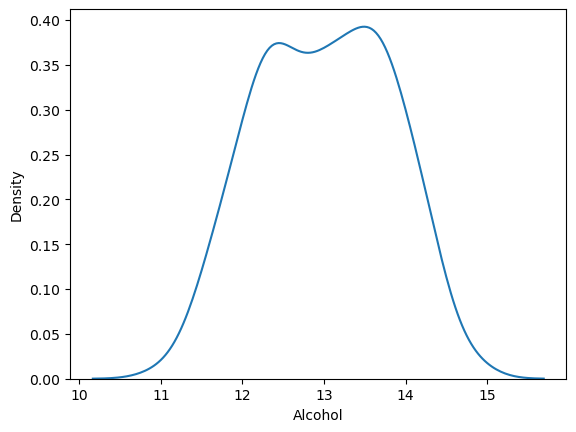

In [3]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

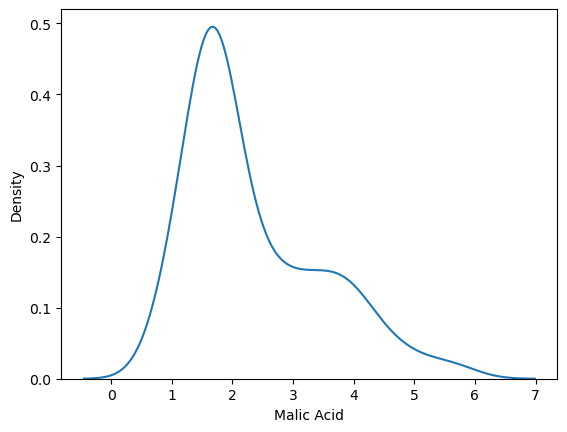

In [4]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

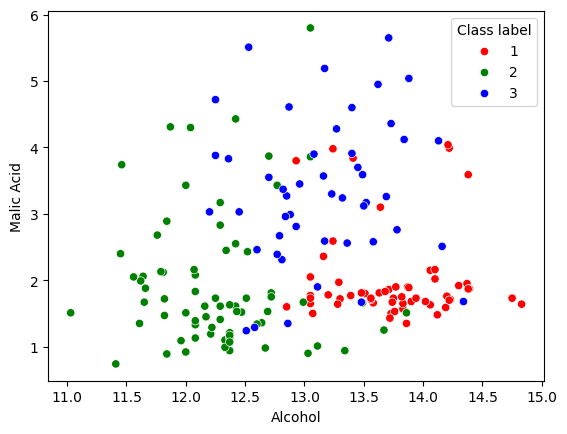

In [5]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x = df['Alcohol'], y = df['Malic Acid'], hue = df['Class label'], palette=color_dict)

In [6]:
from sklearn.model_selection import train_test_split
X= df.drop('Class label', axis=1)
y = df['Class label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [8]:
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameter
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [31]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [33]:
np.round(X_train_scaled.describe(),1) # As we know Min - Max scaling have range from 0 to 1 , so we have min = 0 and max =1 
                                      # in obtained table

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

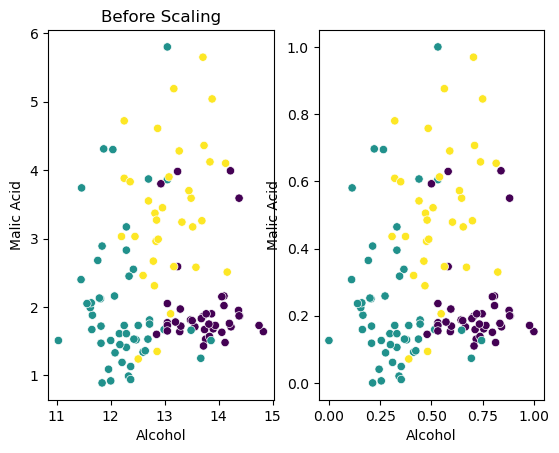

In [ ]:
# Scatterplot before Scaling
plt.subplot(1,2,1)
sns.scatterplot(x = X_train['Alcohol'],y = X_train['Malic Acid'], c = y_train) 
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.scatterplot(x = X_train_scaled['Alcohol'], y = X_train_scaled['Malic Acid'], c = y_train)
plt.title('After Scaling')

# Data representation is almost same

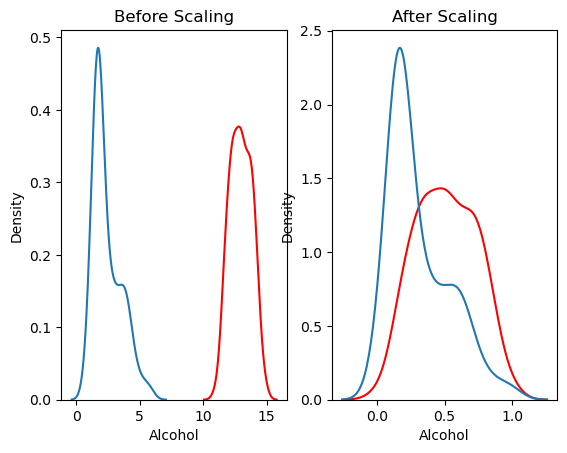

In [ ]:
# Kde plot
plt.subplot(1,2,1)
sns.kdeplot(X_train['Alcohol'], color = 'red')
sns.kdeplot(X_train['Malic Acid'])
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['Alcohol'], color='red')
sns.kdeplot(X_train_scaled['Malic Acid'])
plt.title('After Scaling')
plt.show()
# distribution shape may be change 